# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [32]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [33]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain here why you have changed it.

In [34]:
ID = 2092073
np.random.seed(ID)

Now we load the dataset using the function above.

In [35]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [36]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [58 48 49 42 51 42 53 48 51 58]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [37]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


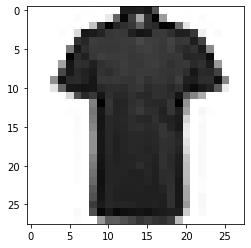

LABEL: 6
INPUT:


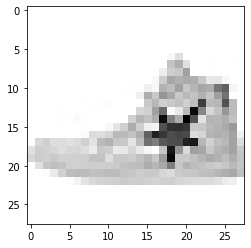

LABEL: 7
INPUT:


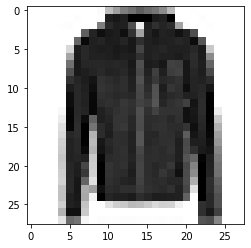

LABEL: 4


In [38]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

### TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn, and verbose=True allows you to see how loss changes in iterations (note that the loss used by the MLPClassifier may be different from the 0-1 loss, also called accuracy).

Then, using the default activation function, we consider four architectures, with different numbers of hidden layers and different sizes. To evaluate the architectures we use the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture.


In [39]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_cv =  GridSearchCV(MLPClassifier(max_iter=300, alpha=1e-4, solver="sgd", tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID), hl_parameters, cv=5, n_jobs=-1)
    
mlp_cv.fit(X_train, y_train)

Iteration 1, loss = 2.25491382
Iteration 2, loss = 1.70733521
Iteration 3, loss = 2.34884016
Iteration 4, loss = 1.72358340
Iteration 5, loss = 1.30505856
Iteration 6, loss = 0.96022002
Iteration 7, loss = 0.91701609
Iteration 8, loss = 1.02280261
Iteration 9, loss = 0.67160418
Iteration 10, loss = 0.73696319
Iteration 11, loss = 0.73527840
Iteration 12, loss = 0.54529491
Iteration 13, loss = 0.53772922
Iteration 14, loss = 0.45836909
Iteration 15, loss = 0.43203743
Iteration 16, loss = 0.38493747
Iteration 17, loss = 0.46283769
Iteration 18, loss = 0.35768386
Iteration 19, loss = 0.35057716
Iteration 20, loss = 0.31233269
Iteration 21, loss = 0.25493533
Iteration 22, loss = 0.24683603
Iteration 23, loss = 0.22137739
Iteration 24, loss = 0.25173307
Iteration 25, loss = 0.33125051
Iteration 26, loss = 0.18892812
Iteration 27, loss = 0.17266796
Iteration 28, loss = 0.17014549
Iteration 29, loss = 0.18244899
Iteration 30, loss = 0.28457711
Iteration 31, loss = 0.15330721
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(learning_rate_init=0.1, max_iter=300,
                                     random_state=2092073, solver='sgd',
                                     verbose=True),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [40]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_cv.best_params_)

print("Score with best parameters:")
print(mlp_cv.best_score_)

print("\nAll scores on the grid:")
print(mlp_cv.cv_results_)

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50, 50)}
Score with best parameters:
0.78

All scores on the grid:
{'mean_fit_time': array([0.60160093, 1.37920341, 0.38080144, 0.83845024]), 'std_fit_time': array([0.27055519, 0.07913069, 0.10716441, 0.05298982]), 'mean_score_time': array([0.00160046, 0.00319824, 0.00160022, 0.00159969]), 'std_score_time': array([0.00320091, 0.00391703, 0.00320044, 0.00319939]), 'param_hidden_layer_sizes': masked_array(data=[(10,), (50,), (10, 10), (50, 50)],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (10,)}, {'hidden_layer_sizes': (50,)}, {'hidden_layer_sizes': (10, 10)}, {'hidden_layer_sizes': (50, 50)}], 'split0_test_score': array([0.62, 0.71, 0.62, 0.74]), 'split1_test_score': array([0.77, 0.81, 0.65, 0.82]), 'split2_test_score': array([0.76, 0.82, 0.17, 0.81]), 'split3_test_score': array([0.77, 0.77, 0.33, 0.77]), 'split4_test_score': array([0

## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?


|            | (10,) | (50,) | (10,10) | (50,50,) |
|------------|-------|-------|---------|----------|
| mean score | 0.732 | 0.77  | 0.476   | 0.78     |

By looking at the mean score of the different architectures, I can observe that by increasing the number of hidden layers, the performance decreases as in the case of one hidden layer with 10 neurons with respect to two hidden layers with 10 neurons for each. The best result is obtained with two hidden layers with 50 neurons for each, but this score is not much greater than the one with one hidden layer with 50 neurons.

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above. Use the attribute *best_estimator_* to pick the best architecture already re-trained on the training dataset (more infos in the documentation of GridSearchCV).

In [41]:
#get training and test error for the best NN model from CV

mlp = mlp_cv.best_estimator_

training_error = 1. - mlp.score(X_train, y_train)

test_error = 1. - mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


RESULTS FOR BEST NN

Best NN training error: 0.108000
Best NN test error: 0.280185


## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before.

In [42]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1012,  982,  978, 1001, 1008, 1004, 1003, 1031,  977, 1004],
       dtype=int64))

## TO DO 4

Now train the NNs with the added data points. This time you can run for 100 iterations if you cannot run for 300 iterations.

In [43]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_large_cv = GridSearchCV(MLPClassifier(max_iter=300, alpha=1e-4, solver="sgd", tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID), hl_parameters, cv=5, n_jobs=-1)

mlp_large_cv.fit(X_train, y_train)

Iteration 1, loss = 0.97761196
Iteration 2, loss = 0.53020741
Iteration 3, loss = 0.46463118
Iteration 4, loss = 0.42322391
Iteration 5, loss = 0.39368520
Iteration 6, loss = 0.37763717
Iteration 7, loss = 0.35884962
Iteration 8, loss = 0.33149101
Iteration 9, loss = 0.31541128
Iteration 10, loss = 0.31275389
Iteration 11, loss = 0.29658956
Iteration 12, loss = 0.26920272
Iteration 13, loss = 0.27555927
Iteration 14, loss = 0.25687842
Iteration 15, loss = 0.25728044
Iteration 16, loss = 0.24621523
Iteration 17, loss = 0.23432262
Iteration 18, loss = 0.23388816
Iteration 19, loss = 0.23130445
Iteration 20, loss = 0.21539199
Iteration 21, loss = 0.20799861
Iteration 22, loss = 0.20814305
Iteration 23, loss = 0.20290893
Iteration 24, loss = 0.18536334
Iteration 25, loss = 0.19315575
Iteration 26, loss = 0.18901716
Iteration 27, loss = 0.19183780
Iteration 28, loss = 0.18521186
Iteration 29, loss = 0.18188527
Iteration 30, loss = 0.17504784
Iteration 31, loss = 0.16729318
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(learning_rate_init=0.1, max_iter=300,
                                     random_state=2092073, solver='sgd',
                                     verbose=True),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [44]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_large_cv.best_params_)

print("Score with best parameters:")
print(mlp_large_cv.best_score_)

print("\nAll scores on the grid:")
print(mlp_large_cv.cv_results_)

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50, 50)}
Score with best parameters:
0.8461000000000001

All scores on the grid:
{'mean_fit_time': array([11.18269453, 23.19604087, 11.31282454, 17.7685163 ]), 'std_fit_time': array([5.20962604, 7.40066544, 2.90114755, 2.71310659]), 'mean_score_time': array([0.00802298, 0.01600022, 0.00963788, 0.00959616]), 'std_score_time': array([3.87030248e-05, 5.22871024e-06, 3.18090297e-03, 5.98463920e-03]), 'param_hidden_layer_sizes': masked_array(data=[(10,), (50,), (10, 10), (50, 50)],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (10,)}, {'hidden_layer_sizes': (50,)}, {'hidden_layer_sizes': (10, 10)}, {'hidden_layer_sizes': (50, 50)}], 'split0_test_score': array([0.667 , 0.8455, 0.811 , 0.8555]), 'split1_test_score': array([0.814 , 0.8565, 0.812 , 0.854 ]), 'split2_test_score': array([0.7885, 0.839 , 0.786 , 0.8395]), 'split3_test_score': arra

## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

|            |  (10,) |  (50,)  |  (10,10) |  (50,50,)  |
|------------|--------|---------|----------|------------|
| mean score | 0.7716 | 0.8417  | 0.7981   | 0.8461     |

In this case, increasing the number of neurons improve the performance but also by increasing the number of hidden layers. In fact, if I compare the first and the third cases that use the same number of neurons (10), I can see that the score is higher in the case with two hidden layers. As before, the best result is obtained by using two hidden layers with 50 neurons for each and also in this case the difference between this one and the one with one hidden layer and 50 neurons is minimal. To conclude, by using 10000 samples for training and increasing the number of hidden layers the performance increases but also in this case, by increasing the number of neurons I obtain the best results.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. 

In [45]:
#get training and test error for the best NN model from CV

best_mlp_large = mlp_large_cv.best_estimator_

training_error = 1. - best_mlp_large.score(X_train, y_train)

test_error = 1. - best_mlp_large.score(X_test, y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.011900
Best NN test error: 0.150360


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?


|                | 500 samples  | 10000 samples |
|----------------|--------------|---------------|
| training error | 0.108000     | 0.011900      |
| test error     | 0.280185     | 0.150360      |

The architectures in the two cases are the same. By looking at the errors I can see that by using more samples I obtain better results, both for training and test error. For what concern the training errors I can see that the second model "has learnt more" and by looking at the test errors I can conclude that the architecture trained with more samples is better in predicting new data.

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

INPUT:


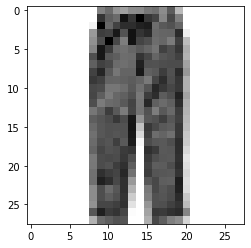

LABEL: 1
mlp prediction:  0


In [46]:
prediction_mlp = mlp.predict(X_test)
misclassified_index_mlp = (np.where(y_test != prediction_mlp))[0]
prediction_mlp_large = best_mlp_large.predict(X_test)
for i in misclassified_index_mlp:
    if(prediction_mlp_large[i] == y_test[i]):
        plot_input(X_test, y_test, i)
        print("mlp prediction: ", prediction_mlp[i])
        break

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


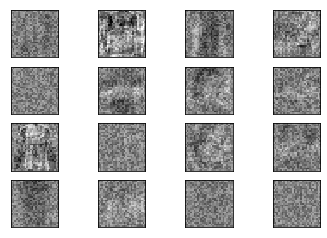

Weights with 10000 data points:


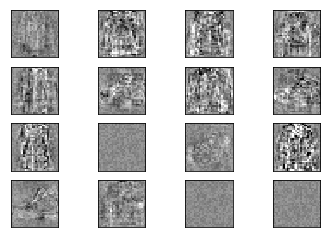

In [47]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

I can see that in the case of 10000 samples the weights look quite similar to the images of the types of clothing, instead in the other one they look very different to the human eye.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[WRITE HERE WHAT CLASSIFIER YOU ARE CHOOSING AND WHAT PARAMETERS YOU NEED TO SET.]**

I've chosen SVM with rbf kernel, and I use 5-fold cross validation to select the best parameters.

In [48]:
from sklearn.svm import SVC
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}
rbf_SVM = SVC(kernel='rbf')
SVM_cv = GridSearchCV(rbf_SVM, parameters, n_jobs=-1)
SVM_cv.fit(X_train, y_train)
print ('RESULTS FOR SVM\n')
print("Best parameters set found:")
print(SVM_cv.best_params_)
print("Score with best parameters:")
print(SVM_cv.best_score_)
SVM = SVM_cv.best_estimator_

training_error_other = 1. - SVM.score(X_train, y_train)

test_error_other = 1. - SVM.score(X_test, y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

RESULTS FOR SVM

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8713
RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.018000
Best test error (other model): 0.122920


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

In the following table I compare the results of NN trained with 10000 samples.

|                | NN       | SVM      |
|----------------|----------|----------|
| training error | 0.011900 | 0.018000 |
| test error     | 0.150360 | 0.122920 |

The training errors of the NN and the SVM are very similar. By looking at the test errors I can see that the second model is better in generalization, but in the other hand, it requires more time for training and predicting new data. To conclude, by looking only at these errors I prefer the SVM model but I think that in many cases the difference between the time required by the two models is more important than the difference between their test error even because the latter is not very high.

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [49]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [50]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 12
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [51]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID)

kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=2092073)

## Comparison of clusters with true labels

## TO DO 13
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [52]:
# compute and print the contingency matrix for the true labels vs the clustering assignments

prediction = kmeans.predict(X_test)
contingency_matrix = metrics.cluster.contingency_matrix(y_test, prediction)

print(contingency_matrix)

[[  23 3373    2   21 1626    0  170  207    0  380]
 [   0  231    0    3  134    0   61 5279    0  104]
 [  24  115    1   20 1832    1 3468   10    0  333]
 [   5 1585    0    2  592    0   51 3224    1  336]
 [  26  842    0   13 1078    0 3538  151    0  156]
 [   8    2 1295    4   48  239    0    1  434 3771]
 [  15 1055    8   51 2108    1 1939   68    0  541]
 [   0    0 4473    2    0   26    0    0  794  525]
 [2269   30  195 2028  461    7  287   32   69  395]
 [   0    2  147    3   37 2666    1    3 2774  168]]


## TO DO 14
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

Since in the matrix for example the value of $A_{i,j}$ is the number of samples in true class i and in predicted class j, the elements in the diagonal of the matrix are the number of samples correctly classified.
By looking at the diagonal, I can see that the performance is not very good, for example the true label 7 is never predicted correctly but in general a lot of samples are predicted wrong.

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 15
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [53]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

list_of_silhouttes = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=ID)
    kmeans.fit(X_train)
    silhouttescore = metrics.silhouette_score(X_train, kmeans.labels_)
    list_of_silhouttes.append(silhouttescore)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.19120649721863053
Silhoutte coefficient for number of clusters=3: 0.19072059502332916
Silhoutte coefficient for number of clusters=4: 0.1805929825695473
Silhoutte coefficient for number of clusters=5: 0.16557590248931178
Silhoutte coefficient for number of clusters=6: 0.15553399068672277
Silhoutte coefficient for number of clusters=7: 0.15958453267347383
Silhoutte coefficient for number of clusters=8: 0.1631572501414511
Silhoutte coefficient for number of clusters=9: 0.15800333509385764
Silhoutte coefficient for number of clusters=10: 0.15503743454657992
Silhoutte coefficient for number of clusters=11: 0.14245908482188577
Silhoutte coefficient for number of clusters=12: 0.14094287050756976
Silhoutte coefficient for number of clusters=13: 0.1363126096780108
Silhoutte coefficient for number of clusters=14: 0.13072822490984937
Silhoutte coefficient for number of clusters=15: 0.13202912386086707


Let us now plot how the silhouette coefficients change with respect to k.

Text(0.5, 1.0, 'Silhouette score per number of clusters')

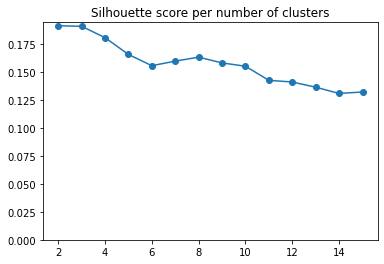

In [54]:
plt.plot([i for i in range(2,16)],list_of_silhouttes, "o-")
plt.gca().set_ylim(bottom=0)
plt.title("Silhouette score per number of clusters")

## TO DO 16

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.


The value of the silhouette coefﬁcient is between [-1, 1]. A value near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters, and negative values indicate that those samples might have been assigned to the wrong cluster. Therefore, I pick the k that corresponds to the silhouette coefficient nearest to the value +1, i.e. k=2. This choice does not match what I know about the data since the dataset is composed of samples that belong 10 different classes. This could be due to the fact that images of different classes may overlap, and if I choose k equal to the number of classes, some clusters are well-separated from the others, while some others may be touching.